# 🎫 TICKET ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Data Loading

In [3]:
df=pd.read_csv('customer_support_tickets.csv')
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


### Data Preview

In [4]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [5]:
df.shape

(8469, 17)

In [6]:
df.sample(4)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
321,322,Tyler Stewart,hpatterson@example.net,66,Female,Adobe Photoshop,2020-10-12,Billing inquiry,Product setup,I'm facing a problem with my {product_purchase...,Open,NaN,High,Email,NaN,NaN,NaN
6645,6646,Kayla Thompson,melissa26@example.net,31,Other,Roomba Robot Vacuum,2020-10-04,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Edge safe dark.,Low,Phone,2023-06-01 10:43:09,2023-06-01 22:00:09,2.0
33,34,Timothy Lyons,darlenelee@example.org,50,Male,Autodesk AutoCAD,2021-12-09,Refund request,Hardware issue,I'm having an issue with the {product_purchase...,Closed,However financial development significant came...,Critical,Social media,2023-06-01 02:01:23,2023-06-01 18:25:23,5.0
6684,6685,Terrence Garrett,michael99@example.org,46,Other,Canon DSLR Camera,2020-12-04,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Chat,NaN,NaN,NaN


In [7]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

### Data Info

In [8]:
df['Customer Satisfaction Rating'].info

<bound method Series.info of 0       NaN
1       NaN
2       3.0
3       3.0
4       1.0
       ... 
8464    NaN
8465    NaN
8466    3.0
8467    3.0
8468    NaN
Name: Customer Satisfaction Rating, Length: 8469, dtype: float64>

In [9]:
df['Date of Purchase'].describe 

<bound method NDFrame.describe of 0       2021-03-22
1       2021-05-22
2       2020-07-14
3       2020-11-13
4       2020-02-04
           ...    
8464    2021-12-08
8465    2020-02-22
8466    2021-08-17
8467    2021-10-16
8468    2020-06-01
Name: Date of Purchase, Length: 8469, dtype: object>

In [10]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [11]:
df.isnull().mean()*100           

Ticket ID                        0.000000
Customer Name                    0.000000
Customer Email                   0.000000
Customer Age                     0.000000
Customer Gender                  0.000000
Product Purchased                0.000000
Date of Purchase                 0.000000
Ticket Type                      0.000000
Ticket Subject                   0.000000
Ticket Description               0.000000
Ticket Status                    0.000000
Resolution                      67.304286
Ticket Priority                  0.000000
Ticket Channel                   0.000000
First Response Time             33.286102
Time to Resolution              67.304286
Customer Satisfaction Rating    67.304286
dtype: float64

### Data Cleaning 

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [14]:
df['First Response Time'].astype

<bound method NDFrame.astype of 2       2023-06-01 11:14:38
3       2023-06-01 07:29:40
4       2023-06-01 00:12:42
10      2023-06-01 17:46:49
11      2023-06-01 12:05:51
               ...         
8452    2023-06-01 14:14:05
8453    2023-06-01 12:56:06
8455    2023-06-01 14:15:07
8466    2023-06-01 09:44:22
8467    2023-06-01 18:28:24
Name: First Response Time, Length: 2769, dtype: object>

In [15]:
df['First Response Time']=pd.to_datetime(df['First Response Time'])
df['First Response Time'].astype

<bound method NDFrame.astype of 2      2023-06-01 11:14:38
3      2023-06-01 07:29:40
4      2023-06-01 00:12:42
10     2023-06-01 17:46:49
11     2023-06-01 12:05:51
               ...        
8452   2023-06-01 14:14:05
8453   2023-06-01 12:56:06
8455   2023-06-01 14:15:07
8466   2023-06-01 09:44:22
8467   2023-06-01 18:28:24
Name: First Response Time, Length: 2769, dtype: datetime64[ns]>

In [16]:
df['Time to Resolution'].astype

<bound method NDFrame.astype of 2       2023-06-01 18:05:38
3       2023-06-01 01:57:40
4       2023-06-01 19:53:42
10      2023-05-31 23:51:49
11      2023-06-01 09:27:51
               ...         
8452    2023-06-01 05:47:05
8453    2023-06-01 04:45:06
8455    2023-06-01 06:58:07
8466    2023-06-01 04:31:22
8467    2023-06-01 05:32:24
Name: Time to Resolution, Length: 2769, dtype: object>

In [17]:
df['Time to Resolution']=pd.to_datetime(df['Time to Resolution'])
df['Time to Resolution'].astype

<bound method NDFrame.astype of 2      2023-06-01 18:05:38
3      2023-06-01 01:57:40
4      2023-06-01 19:53:42
10     2023-05-31 23:51:49
11     2023-06-01 09:27:51
               ...        
8452   2023-06-01 05:47:05
8453   2023-06-01 04:45:06
8455   2023-06-01 06:58:07
8466   2023-06-01 04:31:22
8467   2023-06-01 05:32:24
Name: Time to Resolution, Length: 2769, dtype: datetime64[ns]>

In [18]:
df['Date of Purchase']=pd.to_datetime(df['Date of Purchase'])
df['Date of Purchase'].astype

<bound method NDFrame.astype of 2      2020-07-14
3      2020-11-13
4      2020-02-04
10     2021-01-19
11     2021-10-24
          ...    
8452   2020-03-29
8453   2020-06-20
8455   2021-02-02
8466   2021-08-17
8467   2021-10-16
Name: Date of Purchase, Length: 2769, dtype: datetime64[ns]>

In [19]:
df['Customer Satisfaction Rating'].astype

<bound method NDFrame.astype of 2       3.0
3       3.0
4       1.0
10      1.0
11      1.0
       ... 
8452    3.0
8453    5.0
8455    1.0
8466    3.0
8467    3.0
Name: Customer Satisfaction Rating, Length: 2769, dtype: float64>

In [20]:
df['Customer Gender'].astype

<bound method NDFrame.astype of 2        Other
3       Female
4       Female
10        Male
11        Male
         ...  
8452    Female
8453     Other
8455     Other
8466    Female
8467      Male
Name: Customer Gender, Length: 2769, dtype: object>

In [21]:
for i in df.index:
    if df.loc[i,'Customer Gender']=='Other':
        df.drop(i,inplace=True)
print(df['Customer Gender'])

3       Female
4       Female
10        Male
11        Male
14      Female
         ...  
8435    Female
8440    Female
8452    Female
8466    Female
8467      Male
Name: Customer Gender, Length: 1900, dtype: object


In [22]:
df['Customer Gender']

3       Female
4       Female
10        Male
11        Male
14      Female
         ...  
8435    Female
8440    Female
8452    Female
8466    Female
8467      Male
Name: Customer Gender, Length: 1900, dtype: object

In [23]:
df.head(10)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0
14,15,Amy Hill,medinasteven@example.net,48,Female,Sony PlayStation,2020-02-29,Billing inquiry,Product setup,I'm having an issue with the {product_purchase...,Closed,Officer moment world sing parent available.,High,Chat,2023-06-01 06:22:55,2023-05-31 23:08:55,4.0
19,20,Jeffrey Robertson,jameslopez@example.com,39,Female,Canon EOS,2021-03-08,Refund request,Software bug,I'm having an issue with the {product_purchase...,Closed,Wish mouth build resource though.,Low,Chat,2023-06-01 00:46:04,2023-06-01 20:29:04,5.0
29,30,Austin George,shericase@example.net,67,Male,Xbox,2020-12-26,Cancellation request,Cancellation request,I'm having an issue with the {product_purchase...,Closed,Firm sort voice above which site arrive.,Medium,Phone,2023-06-01 00:54:17,2023-06-01 18:23:17,1.0
31,32,Robert Wilson,zstewart@example.org,60,Male,GoPro Action Camera,2021-12-20,Technical issue,Product compatibility,I'm having an issue with the {product_purchase...,Closed,Certain myself month past tree benefit.,Medium,Social media,2023-06-01 06:42:21,2023-06-01 07:16:21,3.0
33,34,Timothy Lyons,darlenelee@example.org,50,Male,Autodesk AutoCAD,2021-12-09,Refund request,Hardware issue,I'm having an issue with the {product_purchase...,Closed,However financial development significant came...,Critical,Social media,2023-06-01 02:01:23,2023-06-01 18:25:23,5.0
38,39,Kevin Ingram,victor62@example.net,19,Male,Google Pixel,2021-09-10,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,North second between this cell opportunity mov...,Critical,Phone,2023-06-01 18:45:30,2023-05-31 21:53:30,3.0


In [24]:
df.shape

(1900, 17)

### Column Analysis

In [25]:
if  not df['Customer Email'].nunique():
    df['Customer Email'].drop(inplace=True)
print(df['Customer Email'])

3       bradleyolson@example.org
4        bradleymark@example.com
10            mbrown@example.org
11         davisjohn@example.net
14      medinasteven@example.net
                  ...           
8435    tayloralison@example.com
8440    martinaudrey@example.com
8452       jessica60@example.org
8466        ashley83@example.org
8467         fpowell@example.org
Name: Customer Email, Length: 1900, dtype: object


In [26]:
df['Customer Email'].value_counts()

Customer Email
asmith@example.com            3
tbrown@example.net            2
jdavis@example.org            2
ggarcia@example.org           2
johnsonlisa@example.com       2
                             ..
christinahicks@example.com    1
cwerner@example.com           1
seanclark@example.org         1
wdunn@example.com             1
fpowell@example.org           1
Name: count, Length: 1891, dtype: int64

In [27]:
df['Customer Email'] = df['Customer Email'].drop_duplicates()
df['Customer Email']

3       bradleyolson@example.org
4        bradleymark@example.com
10            mbrown@example.org
11         davisjohn@example.net
14      medinasteven@example.net
                  ...           
8435    tayloralison@example.com
8440    martinaudrey@example.com
8452       jessica60@example.org
8466        ashley83@example.org
8467         fpowell@example.org
Name: Customer Email, Length: 1900, dtype: object

In [28]:
df['Customer Email'].value_counts()

Customer Email
bradleyolson@example.org     1
qweiss@example.com           1
ryanfox@example.com          1
timothy60@example.net        1
tperez@example.com           1
                            ..
seanclark@example.org        1
wdunn@example.com            1
yjackson@example.com         1
pearsonjanice@example.com    1
fpowell@example.org          1
Name: count, Length: 1891, dtype: int64

## check dataset

In [29]:
df.isnull().sum()                              #Check for Missing Values

Ticket ID                       0
Customer Name                   0
Customer Email                  9
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [30]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape)                  #Check for Duplicates

(0, 17)


In [31]:
df.info()                                    #Check for Consistent Data Types

<class 'pandas.core.frame.DataFrame'>
Index: 1900 entries, 3 to 8467
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     1900 non-null   int64         
 1   Customer Name                 1900 non-null   object        
 2   Customer Email                1891 non-null   object        
 3   Customer Age                  1900 non-null   int64         
 4   Customer Gender               1900 non-null   object        
 5   Product Purchased             1900 non-null   object        
 6   Date of Purchase              1900 non-null   datetime64[ns]
 7   Ticket Type                   1900 non-null   object        
 8   Ticket Subject                1900 non-null   object        
 9   Ticket Description            1900 non-null   object        
 10  Ticket Status                 1900 non-null   object        
 11  Resolution                    1900 

In [32]:
df.describe()                                 #df.describe()

,Ticket ID,Customer Age,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,1900.000000,1900.000000,1900,1900,1900,1900.000000
mean,4152.978947,43.910526,2020-12-25 03:20:50.526316032,2023-06-01 11:13:14.606842112,2023-06-01 11:20:34.848947200,2.998947
min,4.000000,18.000000,2020-01-01 00:00:00,2023-05-31 21:55:39,2023-05-31 21:53:30,1.000000
25%,2034.750000,31.000000,2020-06-22 18:00:00,2023-06-01 05:14:31,2023-06-01 05:50:45.500000,2.000000
50%,4072.500000,44.000000,2020-12-26 00:00:00,2023-06-01 11:13:15.500000,2023-06-01 11:14:49.500000,3.000000
75%,6265.500000,57.000000,2021-06-26 06:00:00,2023-06-01 17:14:51,2023-06-01 17:06:55.249999872,4.000000
max,8468.000000,70.000000,2021-12-30 00:00:00,2023-06-02 00:54:21,2023-06-02 00:48:38,5.000000
std,2458.861378,15.138831,NaN,NaN,NaN,1.399616


In [33]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0
14,15,Amy Hill,medinasteven@example.net,48,Female,Sony PlayStation,2020-02-29,Billing inquiry,Product setup,I'm having an issue with the {product_purchase...,Closed,Officer moment world sing parent available.,High,Chat,2023-06-01 06:22:55,2023-05-31 23:08:55,4.0


## 📈 1️⃣  Ticket Status Distribution

#### Which ticket status (Open, Closed, or Resolved) occurs most frequently?

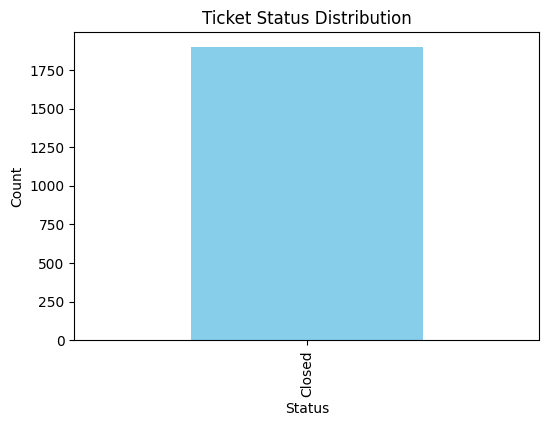

In [34]:
plt.figure(figsize=(6,4))
df['Ticket Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Ticket Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


## 📊 2️⃣ Ticket Priority Breakdown

### What percentage of tickets are marked as “High Priority”?

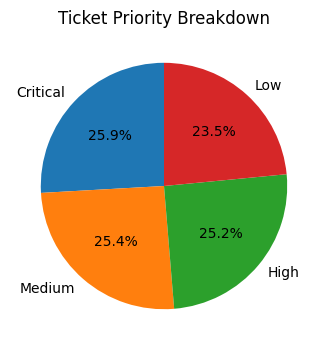

In [35]:
plt.figure(figsize=(6,4))
df['Ticket Priority'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Ticket Priority Breakdown")
plt.ylabel("")
plt.show()

## ⏱️ 3️⃣ Average Resolution Time by Priority

#### Do higher priority tickets take less or more time to resolve on average?

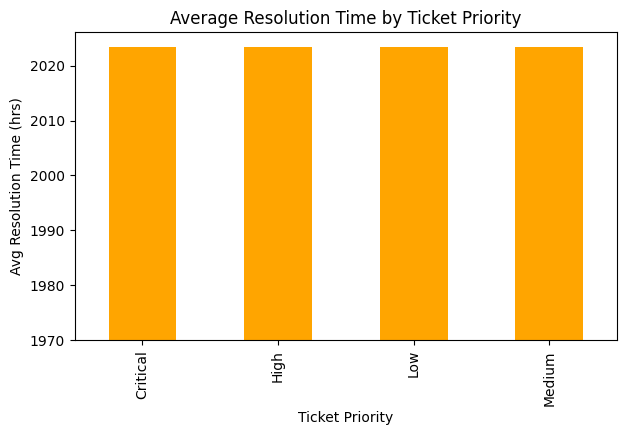

In [36]:
plt.figure(figsize=(7,4))
df.groupby('Ticket Priority')['Time to Resolution'].mean().plot(kind='bar', color='orange')
plt.title("Average Resolution Time by Ticket Priority")
plt.xlabel("Ticket Priority")
plt.ylabel("Avg Resolution Time (hrs)")
plt.show()

## 🎯 4️⃣ Customer Satisfaction vs Ticket Type

#### Which type of ticket gives customers the highest satisfaction rating?

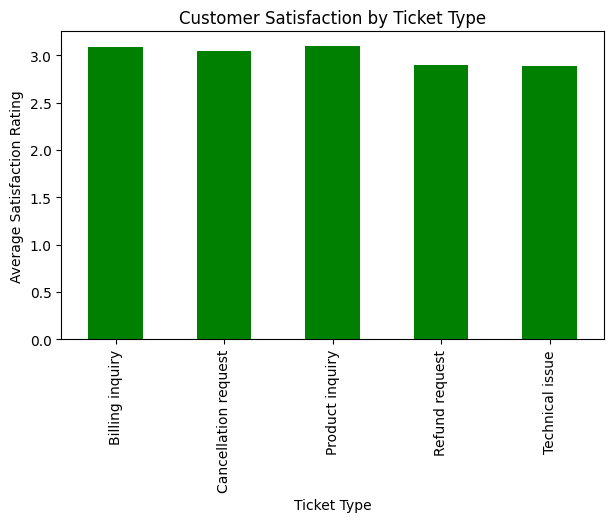

In [37]:
plt.figure(figsize=(7,4))
df.groupby('Ticket Type')['Customer Satisfaction Rating'].mean().plot(kind='bar', color='green')
plt.title("Customer Satisfaction by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Satisfaction Rating")
plt.show()

## 🎯 5️⃣ Customer Gender Distribution

#### Which gender submits more support tickets — Male or Female?

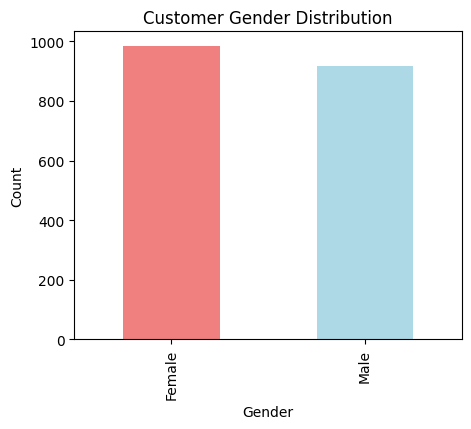

In [38]:
plt.figure(figsize=(5,4))
df['Customer Gender'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## 🎯 6️⃣ Purchase Trend Over Time

#### In which month were the most tickets raised?

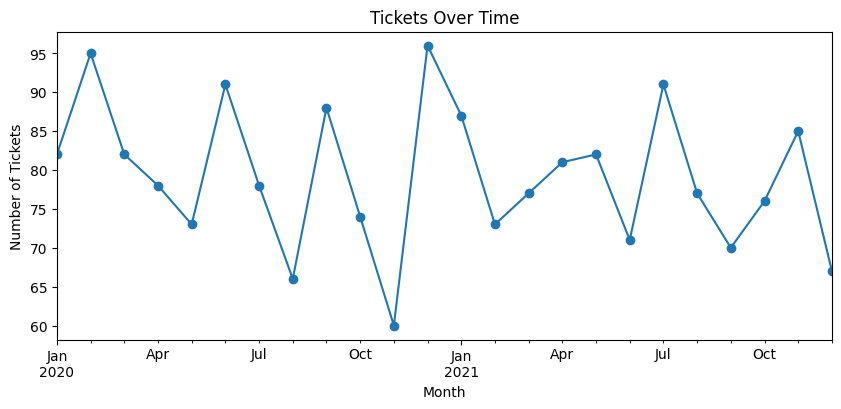

In [39]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
monthly_tickets = df.groupby(df['Date of Purchase'].dt.to_period('M')).size()

plt.figure(figsize=(10,4))
monthly_tickets.plot(kind='line', marker='o')
plt.title("Tickets Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Tickets")
plt.show()

## 🎯 7️⃣ Average Response Time by Channel

#### Which communication channel gives the fastest first response to customers?

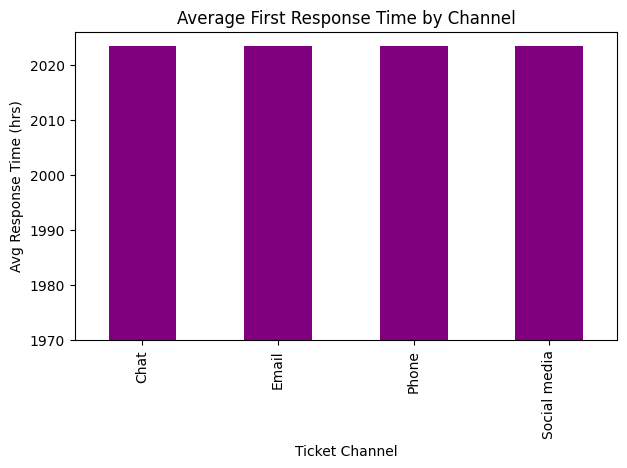

In [40]:
plt.figure(figsize=(7,4))
df.groupby('Ticket Channel')['First Response Time'].mean().plot(kind='bar', color='purple')
plt.title("Average First Response Time by Channel")
plt.xlabel("Ticket Channel")
plt.ylabel("Avg Response Time (hrs)")
plt.show()

In [41]:
df.to_csv('ticket_analysis.csv',index=False)